<a href="https://colab.research.google.com/github/marcossiliprandi/MVP_Machine-learning_Analytics/blob/main/MVP_Classificador_de_cr%C3%A9dito.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**MVP da sprint Machine Learning & Analytics**

Uma determinada instituição financeira encontra-se com problemas na liberação de crédito a seus clientes, que vem gerando prejuízos financeiros.

Considerando que o principal problema está em classificar os clientes como bons e maus pagadores, irei utilizar algorítimos de machine learning de classificação para que a instituição possa realizar a liberação de credito de forma mais assertiva.

Utilizando um dataset que possui os dados históricos dos clientes com informações como idade, duração, histórico de crédito, finalidade, fiador, estado civil, emprego entre outros. Esses dados estão associados ao atributo classe que identifica se o cliente é ou não um bom pagador.

In [ ]:
# Para iniciar será realizado a importação das bibliotecas necessárias

import warnings
warnings.filterwarnings("ignore")

# Importar, manipular e analisar dados
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt # Criação de gráficos
from sklearn.model_selection import train_test_split # Separar base de teste e treino
from sklearn.metrics import accuracy_score # Mostrar acurácia
from sklearn.preprocessing import LabelEncoder # Transformar atributos em numéricos

# Algorítimos de machine learning de classificação
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.tree import DecisionTreeClassifier #Árvore de Classificação
from sklearn.naive_bayes import GaussianNB #Naive Bayes
from sklearn.svm import SVC #SVM

# Validação Cruzada
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

##Preparando os dados

Neste bloco de código estarei utilizando o Pandas para carregar o dataset. Em seguida será criado a matriz de dados e a matriz classes (target) que serão utilizadas no método train_test_split para alimentar de forma aleatória as variáveis de treino e teste conforme a técnica holdout, como possuímos dados categóricos utiliza-se a biblioteca LabelEncoder para transformá-los em numérico e para finalizar a fase de preparação de dados criaremos o Folds para realizar a validação cruzada.

In [ ]:
# Carregando os dados do dataset que se encontra no Github e utilizando o Pandas para tranformar em Dataframe.

url_dados = 'https://raw.githubusercontent.com/marcossiliprandi/MVP_Machine-learning_Analytics/main/Credit.csv'

credito = pd.read_csv(url_dados)

In [ ]:
# Formatando a matriz dados e classe (target)

dados = credito.iloc[:,0:20].values
classe = credito.iloc[:,20].values

In [ ]:
# Transformando atributos categóricos em numéricos

for x in range(20):
  if type(dados[:,x][0]) == str:
    dados[:, x] = LabelEncoder().fit_transform(dados[:, x])

In [ ]:
#Aplicando a técnica holdout e separando os dados de em 30% para teste e 70% para treino. Para manter a mesma amostragem durante a execução estou utilizando o parâmetro random_state

X_treino, X_teste, y_treino, y_teste = train_test_split(dados, classe, test_size = 0.3, random_state = 10)

In [ ]:
# Criando os folds para a validação cruzada

kfold = KFold(n_splits=5, shuffle=True, random_state=10) #Particionando em 5 folds

## Modelagem

Para encontrar o melhor modelo entre os selecionados no inicio do código, os algorítimos serão testados um a um no método de validação cruzada utilizando como método de avaliação a acurácia. Após a avaliação de todos os algorítimos, um boxplot e a média das acurácias irão ser impressas na tela para a avaliação do melhor modelo a ser utilizados para realizar o treinamento e teste.

In [ ]:

# Criando listas para armazenar os nomes e métodos dos algorítimos a serem testados

modelos = []
nomes = []

# Lista para armazenar os resultados da avaliação

resultados = []

# Carregando a lista modelos
modelos.append(('KNN', KNeighborsClassifier()))
modelos.append(('CART', DecisionTreeClassifier()))
modelos.append(('NB', GaussianNB()))
modelos.append(('SVM', SVC()))

In [ ]:
# Função utilizada para manter o resultado em novas execuções

np.random.seed(10)

# Realizando a avaliação de cada modelo

for nome, modelo in modelos:
  resultado = cross_val_score(modelo, X_treino, y_treino, cv=kfold, scoring='accuracy')
  resultados.append(resultado)
  nomes.append(nome)
  print("%s: %f (%f)" % (nome, resultado.mean(), resultado.std()))

KNN: 0.650000 (0.036978)
CART: 0.671429 (0.050910)
NB: 0.700000 (0.045848)
SVM: 0.714286 (0.043566)


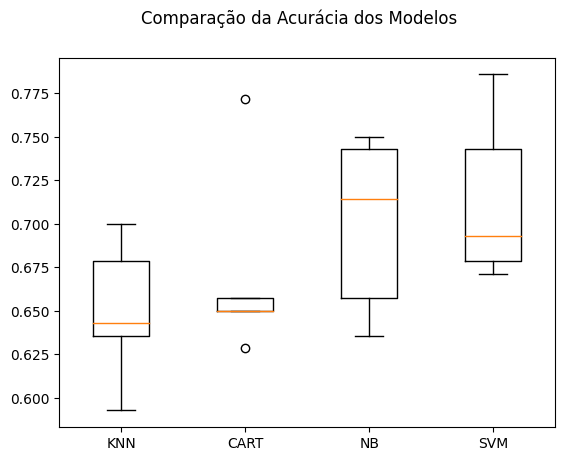

In [ ]:
# Mostrando gráfico comparativo das acurácias dos modelos

fig = plt.figure()
fig.suptitle('Comparação da Acurácia dos Modelos')
ax = fig.add_subplot(111)
plt.boxplot(resultados)
ax.set_xticklabels(nomes)
plt.show()

In [ ]:
# Analisando as informações de acurácia de cada modelo, optarei por seguir o treinamento utilizando o algorítimo SVM

# Criando o modelo de teste

modelo = SVC()
modelo.fit(X_treino,y_treino)

# Realizando as predições de testes

predicao = modelo.predict(X_teste)

# Verificando acurácia de teste

acur = accuracy_score(y_teste,predicao)
print("A acurácia do conjunto de teste é de %f" % (acur))

A acurácia do conjunto de teste é de 0.693333


In [ ]:
# Analisando o resultado do modelo SVM, realizarei a fim de teste o treinamento utilizando o algorítimo NB

# Criando o modelo de teste

modelo = GaussianNB()
modelo.fit(X_treino,y_treino)

# Realizando as predições de testes

predicao = modelo.predict(X_teste)

# Verificando acurácia de teste

acur = accuracy_score(y_teste,predicao)
print("A acurácia do conjunto de teste é de %f" % (acur))

A acurácia do conjunto de teste é de 0.703333


## Análise dos Modelos

Ao avaliar os modelos utilizando o validação cruzada conclui-se que o modelo com a maior acurácia foi o SVM com 71,4%, no qual realizei o treinamento e teste. Verifiquei a acurácia e a predição não estão obtendo o resultado esperado e realizei um novo trinamento e teste utilizando o algorítimo Naive Bayes, que teve uma acurácia de 70% na avaliação.

Com o algorítimo NB obtive um resultado mais próximo do esperado com uma acurácia se mantendo em 70% enquanto o SVM teve uma acurácia de teste de 69,3%. Cheguei a conclusão que para melhorar o resultado será necessário realizar a feature selection.

# Seleção de atributos

Neste bloco de código utilizarei as técnicas de Seleção Univariada, Eliminação Recursiva e Importância de Atributos para identificar os melhores atributos de cada método e no fim realizar uma análise dos resultados.

###Seleção Univariada

In [ ]:
# Importando as bibliotecas de seleção univariada
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

# Selecionando os melhores atributos

sb = SelectKBest(score_func=f_classif, k=4)

# Obtendo os atributos selecionados

fit = sb.fit(dados,classe)
selecionados = fit.transform(dados)

# Exibibindo os atributos selecionados

print("Atributos selecionados:", sb.get_feature_names_out(input_features=credito.columns[0:-1]))

Atributos selecionados: ['checking_status' 'duration' 'credit_amount' 'savings_status']


In [ ]:
# Selecionando os atributos da amostragem separada aleatoriamente para treinar os modelos anteriores.

X_treino_fs = selecionados[0:len(X_treino)]

In [ ]:
# Função utilizada para manter o resultado em novas execuções

np.random.seed(10)

# Realizando a avaliação de cada modelo com os atributos selecionados

for nome, modelo in modelos:
  resultado = cross_val_score(modelo, X_treino_fs, y_treino, cv=kfold, scoring='accuracy')
  resultados.append(resultado)
  nomes.append(nome)
  print("%s: %f (%f)" % (nome, resultado.mean(), resultado.std()))

KNN: 0.677143 (0.032071)
CART: 0.608571 (0.037634)
NB: 0.700000 (0.039641)
SVM: 0.710000 (0.042523)


###Eliminação Recursiva dos atributos

In [ ]:
# Importando as bibliotecas de eliminação recursiva
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Selecionando a Regressão logística como modelo

modelo = LogisticRegression(max_iter=1000)

# Selecionando os melhores atributos

rfe = RFE(modelo, n_features_to_select=4)

# Obtendo os atributos selecionados

fit = rfe.fit(dados,classe)
selecionados = fit.transform(dados)

# Exibindo os atributos selecionados

print("Nomes dos Atributos Selecionados: ", fit.get_feature_names_out(input_features=credito.columns[0:-1]))

Nomes dos Atributos Selecionados:  ['checking_status' 'credit_history' 'other_payment_plans' 'foreign_worker']


In [ ]:
# Selecionando os atributos da amostragem separada aleatoriamente para treinar os modelos anteriores.

X_treino_fs = selecionados[0:len(X_treino)]

In [ ]:
# Função utilizada para manter o resultado em novas execuções

np.random.seed(10)

# Realizando a avaliação de cada modelo

for nome, modelo in modelos:
  resultado = cross_val_score(modelo, X_treino_fs, y_treino, cv=kfold, scoring='accuracy')
  resultados.append(resultado)
  nomes.append(nome)
  print("%s: %f (%f)" % (nome, resultado.mean(), resultado.std()))

KNN: 0.674286 (0.076479)
CART: 0.697143 (0.038492)
NB: 0.690000 (0.038492)
SVM: 0.710000 (0.042523)


###Importância de Atributos

In [ ]:
# Importando a biblioteca ExtraTrees para classificar a importância dos atributos
from sklearn.ensemble import ExtraTreesClassifier

# Criando o modelo para seleção de atributos
modelo = ExtraTreesClassifier(n_estimators=100)

# Classificando os atributos
fit = modelo.fit(dados,classe)

# Exibindo os atributos de maior importância ao de menor importância
importantes = fit.feature_importances_
indices = np.argsort(importantes)[::-1]
for i in indices:
  print("O atributo %s possui %.3f de importância" % (credito.columns[i], fit.feature_importances_[i]))

O atributo checking_status possui 0.111 de importância
O atributo duration possui 0.088 de importância
O atributo credit_amount possui 0.078 de importância
O atributo age possui 0.068 de importância
O atributo credit_history possui 0.059 de importância
O atributo purpose possui 0.059 de importância
O atributo employment possui 0.054 de importância
O atributo installment_commitment possui 0.052 de importância
O atributo residence_since possui 0.052 de importância
O atributo savings_status possui 0.051 de importância
O atributo property_magnitude possui 0.051 de importância
O atributo personal_status possui 0.043 de importância
O atributo job possui 0.041 de importância
O atributo other_payment_plans possui 0.039 de importância
O atributo housing possui 0.035 de importância
O atributo existing_credits possui 0.033 de importância
O atributo own_telephone possui 0.031 de importância
O atributo other_parties possui 0.023 de importância
O atributo num_dependents possui 0.022 de importância
O

In [ ]:
# Selecionar os índices com maiores importância do extratrees

indices = np.argsort(importantes)[::-1][:11]
X_treino_fs = X_treino[:,indices]

In [ ]:
# Função utilizada para manter o resultado em novas execuções

np.random.seed(10)

# Realizando a avaliação de cada modelo

for nome, modelo in modelos:
  resultado = cross_val_score(modelo, X_treino_fs, y_treino, cv=kfold, scoring='accuracy')
  resultados.append(resultado)
  nomes.append(nome)
  print("%s: %f (%f)" % (nome, resultado.mean(), resultado.std()))

KNN: 0.650000 (0.036978)
CART: 0.657143 (0.041157)
NB: 0.730000 (0.040758)
SVM: 0.715714 (0.044584)


## Análise da seleção de atributos

Ao aplicar as técnicas de seleção de atributos avaliei cada técnica variando o valor de atributos selecionados (n_features) entre 4 e 12.

Durante a análise dos testes verifiquei que utilizando as técnicas de Seleção Univariada e Eliminação Recursiva que quanto maior o valor de atributos selecionados menor acurácia dos modelos e ambas obtiveram o melhor resultado com a escolha de 4 atributos, apesar de haver diferença entre os atributos selecionados a maior acurácia continuou sendo do algorítimo SVM com 71% nas duas técnicas.

Já a técnica de Importância de Atributos houve um melhor desempenho no algorítimo NB que alcançou 73% de acurácia utilizando os 11 atributos mais importantes, passando nesse momento a ser o algorítimo com a melhor acurácia enquanto SVM continuo com a acurácia de aproximadamente 71%.

Concluí que a melhor técnica a ser aplicada nesse momento seria a de importância de atributos utilizando os 11 mais importantes, porem para verificar se há a possibilidade de melhorar o desempenho estarei realizando teste com os métodos Ensembles.

# Ensembles

Buscando encontrar o melhor modelo preditivo neste bloco estarei utilizando os métodos ensembles bagging, boosting e voting que utilizam a combinação vários algorítimos de machine learning para obter melhores resultados nas previsões.

In [ ]:
# Importando as bibliotecas necessárias para os modelos ensembles
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression

# Obs.: A biblioteca ExtraTreesClassifier foi importada anteriormente

In [ ]:
# Criando listas para armazenar os nomes e métodos ensembles a serem testados

modelos_en = []
nomes_en = []

# Lista para armazenar os resultados da avaliação

resultados_en = []

# Adicionando parâmetros do classificador BaggingClassifier
base = DecisionTreeClassifier()
num_trees = 100
max_features = 12

# Criando os modelos para o VotingClassifier
bases = []
model1 = LogisticRegression(max_iter=500)
bases.append(('logistic', model1))
model2 = DecisionTreeClassifier()
bases.append(('cart', model2))
model3 = SVC()
bases.append(('svm', model3))

# Criando os ensembles e adicionando-os na lista de modelos
modelos_en.append(('Bagging', BaggingClassifier(base_estimator=base, n_estimators=num_trees)))
modelos_en.append(('RF', RandomForestClassifier(n_estimators=num_trees, max_features=max_features)))
modelos_en.append(('ET', ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features)))
modelos_en.append(('Ada', AdaBoostClassifier(n_estimators=num_trees)))
modelos_en.append(('GB', GradientBoostingClassifier(n_estimators=num_trees)))
modelos_en.append(('Voting', VotingClassifier(bases)))

In [ ]:
# Função utilizada para manter o resultado em novas execuções

np.random.seed(10)

# Realizando a avaliação de cada modelo

for nome_en, modelo_en in modelos_en:
  resultado_en = cross_val_score(modelo_en, X_treino, y_treino, cv=kfold, scoring='accuracy')
  resultados_en.append(resultado)
  nomes_en.append(nome)
  print("%s: %f (%f)" % (nome_en, resultado_en.mean(), resultado_en.std()))

Bagging: 0.750000 (0.044032)
RF: 0.757143 (0.043331)
ET: 0.730000 (0.033625)
Ada: 0.701429 (0.026878)
GB: 0.738571 (0.032764)
Voting: 0.715714 (0.037634)


## Análise Ensembles

Ao executar os métodos ensembles verifica-se que as acurácias obtiveram um melhor resultado comparado aos testes anteriores, destacando o método de classificação RandomForest que chegou a acurácia de 75,7% sendo até aqui a melhor acurácia obtida.

Para checar se há a possibilidade de obter melhores resultados na próxima fase estarei utilizando utilizando técnicas de transformação de dados.

# Transformação de dados

Para apresentar um melhor resultado vou utilizar as técnicas de Normalização e a Padronização para redimensionar os dados, para que não haja vazamento de dados o uso de Pipelines será necessário.

In [ ]:
# Importação as bibliotecas necessárias

from sklearn.preprocessing import StandardScaler # Padronização
from sklearn.preprocessing import MinMaxScaler # Normalização
from sklearn.pipeline import Pipeline # Pipeline (Vazamento de dados)

In [ ]:
# Criando listas para armazenar os nomes e métodos das Pipelines das técnicas de Padronização e Normalização

pipelines = []
nomes_pip = []

# Lista para armazenar os resultados da avaliação
resultados_pip = []

# Selecionando os algorítimos
reg_log = ('LR', LogisticRegression(max_iter=500))
knn = ('KNN', KNeighborsClassifier())
cart = ('CART', DecisionTreeClassifier())
naive_bayes = ('NB', GaussianNB())
svm = ('SVM', SVC())
bagging = ('Bag', BaggingClassifier(base_estimator=base, n_estimators=num_trees))
random_forest = ('RF', RandomForestClassifier(n_estimators=num_trees, max_features=max_features))
extra_trees = ('ET', ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features))
adaboost = ('Ada', AdaBoostClassifier(n_estimators=num_trees))
gradient_boosting = ('GB', GradientBoostingClassifier(n_estimators=num_trees))
voting = ('Voting', VotingClassifier(bases))

# Transformações que serão utilizadas
padro = ('StandardScaler', StandardScaler())
norm = ('MinMaxScaler', MinMaxScaler())

# Padronizando os atributos
pipelines.append(('LR-padr', Pipeline([padro, reg_log])))
pipelines.append(('KNN-padr', Pipeline([padro, knn])))
pipelines.append(('CART-padr', Pipeline([padro, cart])))
pipelines.append(('NB-padr', Pipeline([padro, naive_bayes])))
pipelines.append(('SVM-padr', Pipeline([padro, svm])))
pipelines.append(('Bag-padr', Pipeline([padro, bagging])))
pipelines.append(('RF-padr', Pipeline([padro, random_forest])))
pipelines.append(('ET-padr', Pipeline([padro, extra_trees])))
pipelines.append(('Ada-padr', Pipeline([padro, adaboost])))
pipelines.append(('GB-padr', Pipeline([padro, gradient_boosting])))
pipelines.append(('Vot-padr', Pipeline([padro, voting])))

# Normalizando os atributos
pipelines.append(('LR-norm', Pipeline([norm, reg_log])))
pipelines.append(('KNN-norm', Pipeline([norm, knn])))
pipelines.append(('CART-norm', Pipeline([norm, cart])))
pipelines.append(('NB-norm', Pipeline([norm, naive_bayes])))
pipelines.append(('SVM-norm', Pipeline([norm, svm])))
pipelines.append(('Bag-norm', Pipeline([norm, bagging])))
pipelines.append(('RF-norm', Pipeline([norm, random_forest])))
pipelines.append(('ET-norm', Pipeline([norm, extra_trees])))
pipelines.append(('Ada-norm', Pipeline([norm, adaboost])))
pipelines.append(('GB-norm', Pipeline([norm, gradient_boosting])))
pipelines.append(('Vot-norm', Pipeline([norm, voting])))

In [ ]:
# Função utilizada para manter o resultado em novas execuções

np.random.seed(10)

# Realizando a avaliação de cada modelo com a Pipeline
for nome_pip, modelo_pip in pipelines:
  resultado_pip = cross_val_score(modelo_pip, X_treino, y_treino, cv=kfold, scoring='accuracy')
  resultados_pip.append(resultado_pip)
  nomes_pip.append(nome_pip)
  print("%s: %f (%f)" % (nome_pip, resultado_pip.mean(), resultado_pip.std()))

LR-padr: 0.721429 (0.045848)
KNN-padr: 0.704286 (0.047509)
CART-padr: 0.670000 (0.052177)
NB-padr: 0.698571 (0.040000)
SVM-padr: 0.720000 (0.037088)
Bag-padr: 0.747143 (0.045311)
RF-padr: 0.762857 (0.042714)
ET-padr: 0.738571 (0.031816)
Ada-padr: 0.701429 (0.026878)
GB-padr: 0.738571 (0.033074)
Vot-padr: 0.727143 (0.035971)
LR-norm: 0.725714 (0.044401)
KNN-norm: 0.712857 (0.045491)
CART-norm: 0.675714 (0.039538)
NB-norm: 0.698571 (0.040000)
SVM-norm: 0.724286 (0.043472)
Bag-norm: 0.741429 (0.036812)
RF-norm: 0.752857 (0.045535)
ET-norm: 0.735714 (0.023905)
Ada-norm: 0.701429 (0.026878)
GB-norm: 0.740000 (0.031493)
Vot-norm: 0.727143 (0.043189)


## Análise da Transformação de dados

Com os resultados obtidos pude observar que houve a melhora na acurácia em todos os algorítimos e métodos de classificação. O método RandomForest junto com a técnica de padronização atingiu a acurácia de 76,28%, sendo o método escolhido para a finalização do modelo.

# Finalizando o modelo

In [ ]:
# Preparando o modelo

fit = StandardScaler().fit(X_treino)
treino = fit.transform(X_treino)
RF = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)
RF.fit(treino, y_treino)

RandomForestClassifier(max_features=12)

In [ ]:
# Realizando o modelo treinado no dataset separado para teste
teste = fit.transform(X_teste)
predictions = RF.predict(teste)

# Verificando a acurácia
print(accuracy_score(y_teste, predictions))

0.7333333333333333


In [ ]:
# Realizando teste com todo o conjunto de teste

fit = StandardScaler().fit(dados)
final = fit.transform(dados)
RF.fit(final,classe)

#Conclusão

Para poder atender a solicitação da Instituição Financeira e classificar os clientes em bons e maus pagadores, inicialmente foi necessário realizar a importação de todas as bibliotecas de manipulação, importação e análise de dados e as bibliotecas referente aos algorítimos de machine learning de classificação. Após as importações foi realizado a carga do dataset para uma variável e em seguida aplicada a técnica Holdout, onde o dataset ficou dividido com 70% para treino e 30% para teste.

Na fase de modelagem utilizamos os algorítimos KNN, Árvore de Classificação, Naive Bayes e SVM, com a validação cruzada, foram avaliados e comparados. Ao avaliar os resultados viu-se a necessidade de realização de testes para alcançar um melhor resultado. Sendo assim foram utilizadas as técnicas de Seleção de Atributos, Ensembles e de Transformação de Dados.

Ao final das análises conclui que o melhor resultado obtido foi ao utilizar o método RandomForest da técnica Ensemble em conjunto com a técnica de Padronização, que chegou a acurácia de 76,28%. Ao realizar o treinamento e o teste com os métodos e técnicas escolhidos observa-se que a acurácia obtida foi de  73,33%, abaixo da esperada. Para que possa aumentar a acurácia neste caso seria necessário avaliar os atributos do dataset.